a


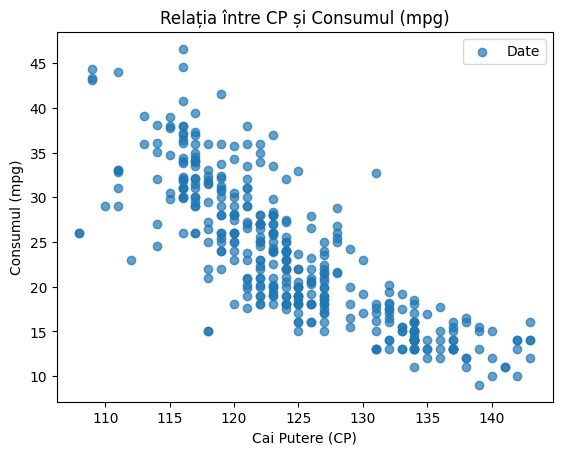

b


Output()

Output()

c


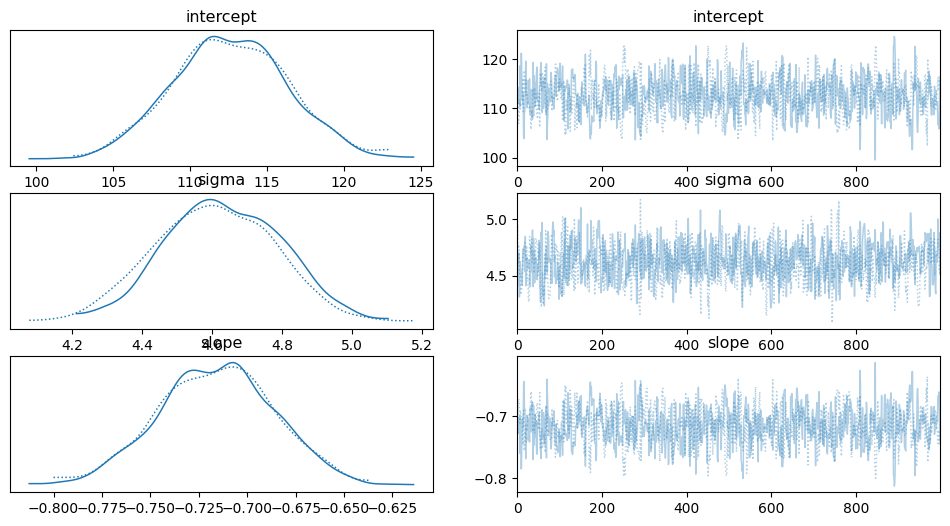

d


<ipython-input-3-d8db81d6ec57>:53: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = az.hdi(posterior_preds.T, hdi_prob=0.95)


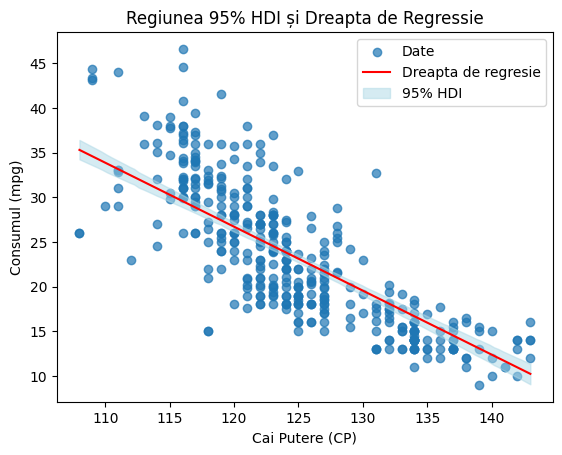

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

print('a')
data = pd.read_csv('auto-mpg.csv')

data = data[['horsepower', 'mpg']].dropna()

data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data = data.dropna()

plt.scatter(data['horsepower'], data['mpg'], alpha=0.7, label='Date')
plt.xlabel('Cai Putere (CP)')
plt.ylabel('Consumul (mpg)')
plt.title('Relația între CP și Consumul (mpg)')
plt.legend()
plt.show()

print('b')
with pm.Model() as model:
    X = data['horsepower'].values
    Y = data['mpg'].values

    intercept = pm.Normal("intercept", mu=0, sigma=10)
    slope = pm.Normal("slope", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)

    mu = intercept + slope * X

    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=Y)

    trace = pm.sample(1000, tune=1000, return_inferencedata=True)

print('c')
az.plot_trace(trace)
plt.show()

slope_mean = trace.posterior['slope'].mean().values
intercept_mean = trace.posterior['intercept'].mean().values

print('d')
x_vals = np.linspace(X.min(), X.max(), 100)

posterior_preds = np.array([
    trace.posterior['intercept'].values.flatten() +
    trace.posterior['slope'].values.flatten() * x_val
    for x_val in x_vals
])

hdi = az.hdi(posterior_preds.T, hdi_prob=0.95)

plt.scatter(data['horsepower'], data['mpg'], alpha=0.7, label='Date')
plt.plot(x_vals, intercept_mean + slope_mean * x_vals, color='red', label='Dreapta de regresie')
plt.fill_between(x_vals, hdi[:, 0], hdi[:, 1], color='lightblue', alpha=0.5, label='95% HDI')
plt.xlabel('Cai Putere (CP)')
plt.ylabel('Consumul (mpg)')
plt.title('Regiunea 95% HDI și Dreapta de Regressie')
plt.legend()
plt.show()


a


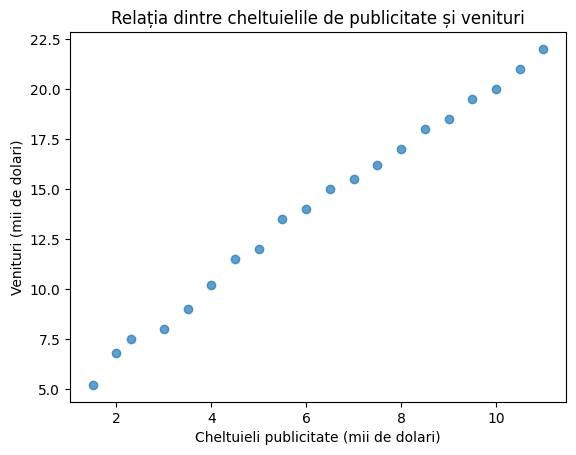

b


Output()

Output()

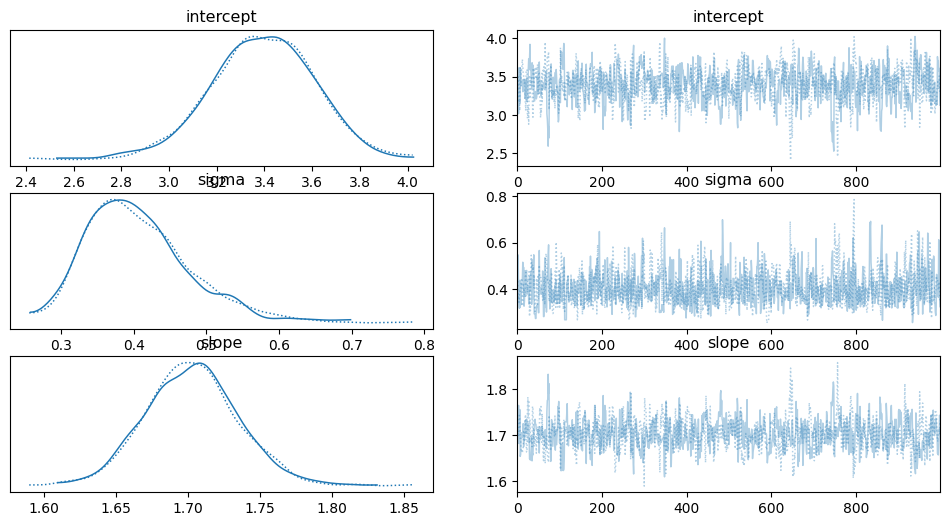

            mean  hdi_2.5%  hdi_97.5%
intercept  3.391     2.964      3.826
sigma      0.407     0.291      0.562
slope      1.703     1.640      1.765
c
Cheltuieli de publicitate: 12.0 mii de dolari
Predicție medie a veniturilor: 23.83 mii de dolari
Interval HDI 95%: 23.40 - 24.26 mii de dolari

Cheltuieli de publicitate: 12.5 mii de dolari
Predicție medie a veniturilor: 24.68 mii de dolari
Interval HDI 95%: 24.23 - 25.14 mii de dolari

Cheltuieli de publicitate: 13.0 mii de dolari
Predicție medie a veniturilor: 25.53 mii de dolari
Interval HDI 95%: 25.07 - 26.04 mii de dolari



<ipython-input-1-022fead1bea6>:56: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  predicted_hdi = az.hdi(posterior_preds, hdi_prob=0.95)


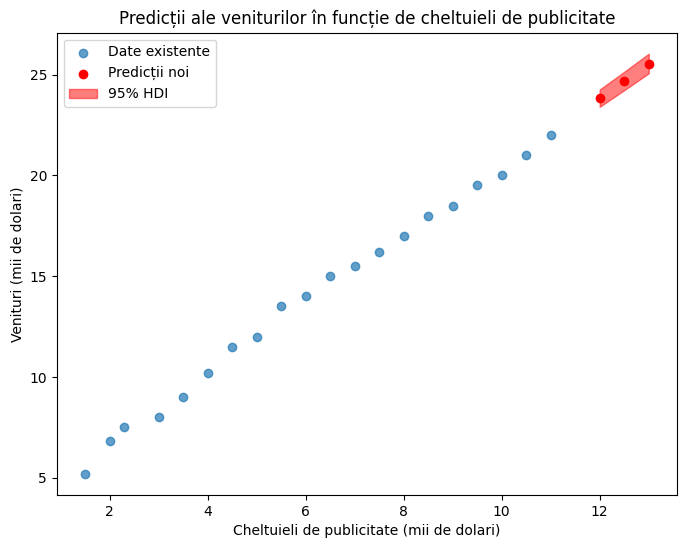

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

publicitate = np.array([1.5, 2.0, 2.3, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0])
vanzare = np.array([5.2, 6.8, 7.5, 8.0, 9.0, 10.2, 11.5, 12.0, 13.5, 14.0, 15.0, 15.5, 16.2, 17.0, 18.0, 18.5, 19.5, 20.0, 21.0, 22.0])

print('a')
plt.scatter(publicitate, vanzare, alpha=0.7)
plt.xlabel('Cheltuieli publicitate (mii de dolari)')
plt.ylabel('Venituri (mii de dolari)')
plt.title('Relația dintre cheltuielile de publicitate și venituri')
plt.show()

print('b')
with pm.Model() as model:

    X = publicitate
    Y = vanzare

    intercept = pm.Normal("intercept", mu=0, sigma=10)
    slope = pm.Normal("slope", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=1)

    mu = intercept + slope * X

    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=Y)

    trace = pm.sample(1000, tune=1000, return_inferencedata=True)

az.plot_trace(trace)
plt.show()

summary = az.summary(trace, hdi_prob=0.95)
print(summary[['mean', 'hdi_2.5%', 'hdi_97.5%']])

print('c')
new_publicitate = np.array([12, 12.5, 13])
intercept_samples = trace.posterior["intercept"].values.flatten()
slope_samples = trace.posterior["slope"].values.flatten()

posterior_preds = intercept_samples[:, np.newaxis] + slope_samples[:, np.newaxis] * new_publicitate

predicted_mean = np.mean(posterior_preds, axis=0)
predicted_hdi = az.hdi(posterior_preds, hdi_prob=0.95)

for i, val in enumerate(new_publicitate):
    print(f"Cheltuieli de publicitate: {val} mii de dolari")
    print(f"Predicție medie a veniturilor: {predicted_mean[i]:.2f} mii de dolari")
    print(f"Interval HDI 95%: {predicted_hdi[i, 0]:.2f} - {predicted_hdi[i, 1]:.2f} mii de dolari")
    print()

plt.figure(figsize=(8, 6))
plt.scatter(publicitate, vanzare, alpha=0.7, label='Date existente')
plt.scatter(new_publicitate, predicted_mean, color='red', label='Predicții noi')
plt.fill_between(new_publicitate, predicted_hdi[:, 0], predicted_hdi[:, 1], color='red', alpha=0.5, label='95% HDI')
plt.xlabel('Cheltuieli de publicitate (mii de dolari)')
plt.ylabel('Venituri (mii de dolari)')
plt.title('Predicții ale veniturilor în funcție de cheltuieli de publicitate')
plt.legend()
plt.show()
